In [265]:
from faker import Faker
import pandas as pd
import random
from datetime import timedelta
import numpy as np
import plotly.graph_objects as go
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.stattools import durbin_watson
import ta
from tensorflow.keras.callbacks import EarlyStopping
import itertools

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
fake = Faker()

supplier1_df = pd.read_csv('data/supplier1_feeder.csv')
supplier2_df = pd.read_csv('data/supplier2_feeder.csv')
supplier3_df = pd.read_csv('data/supplier3_feeder.csv')
supplier4_df = pd.read_csv('data/supplier4_feeder.csv')
supplier5_df = pd.read_csv('data/supplier5_feeder.csv')
supplier6_df = pd.read_csv('data/supplier6_feeder.csv')
supplier7_df = pd.read_csv('data/supplier7_feeder.csv')
supplier8_df = pd.read_csv('data/supplier8_feeder.csv')
supplier9_df = pd.read_csv('data/supplier9_feeder.csv')
supplier10_df = pd.read_csv('data/supplier10_feeder.csv')
supplier11_df = pd.read_csv('data/supplier11_feeder.csv')
supplier12_df = pd.read_csv('data/supplier12_feeder.csv')
supplier13_df = pd.read_csv('data/supplier13_feeder.csv')
supplier14_df = pd.read_csv('data/supplier14_feeder.csv')

In [7]:
def create_supplier_invoices_and_payments(feeder, supplier_name):
    
    # Random Parameter Assignments
    payment_terms_days = [30, 45, 60, 90]
    payee_types = ['Supplier', 'Contingent Worker', 'Ad Hoc Payee']
    items = ['Laptop', 'Desk', 'Chairs', 'Monitor', 'Food', 'Beverages']
    categories = ['Materials', 'Consulting', 'IT Services', 'Marketing']
    supplier_ratings = ['High', 'Medium', 'Low']
    supplierBanks = ['Chase', 'BOA', 'WellsFargo']
    companyBanks = ['Chase', 'BOA', 'WellsFargo']
    paymentTypes = ['Check', 'Cash', 'Direct Deposit', 'Zelle']
    feeder['Date'] = pd.to_datetime(feeder['Date']).dt.date

    # Create invoices and payments
    invoice_data = []
    payment_data = []

    for _, row in feeder.iterrows():
        for _ in range(1):  # Generate one invoice per date
            # Generate invoice details
            invoice_id = fake.unique.bothify(text="INV#################")
            company = 'Company A'
            currency = 'USD'
            item = random.choice(items)
            quantity = row['Rough_Volume']
            category = random.choice(categories)
            payee_type = random.choice(payee_types)
            supplier_rating = random.choice(supplier_ratings)
            urgency = random.choice(['High', 'Normal'])
            payment_term = random.choice(payment_terms_days)

            # Invoice amount within stock's low and high prices
            original_amount = round(random.uniform(row['Starting_Inv_Amount'], row['Ending_Inv_Amount']),2)

            # Create invoice record
            invoice_data.append([
                supplier_name, invoice_id, company, currency, item, quantity, category, payee_type,
                supplier_rating, urgency, row['Date'], original_amount, payment_term
            ])

            # Generate payment details
            total_payment = 0
            num_payments = random.choice([0, 1, 2, 3])  # Randomize partial payments
            supplierBank = random.choice(supplierBanks)
            companyBank = random.choice(companyBanks)
            paymentType = random.choice(paymentTypes)
            for _ in range(num_payments):
                payment_amount = round(original_amount / num_payments, 2)
                payment_date = row['Date'] + timedelta(days=30)  # Payment always a month later
                payment_data.append([
                    invoice_id, payment_date, payment_amount, paymentType, supplierBank, companyBank
                ])
                total_payment += payment_amount

            # Determine payment status based on total payments
            payment_status = (
                'Paid' if total_payment >= original_amount else
                'Partially Paid' if 0 < total_payment < original_amount else
                'Unpaid'
            )

            # Update the invoice with payment status
            invoice_data[-1].append(payment_status)

    # Create DataFrames
    supplier_invoices_df = pd.DataFrame(invoice_data, columns=[
        'Supplier Name', 'Invoice ID', 'Company', 'Currency', 'Item', 'Quantity', 'Category', 'Payee Type',
        'Supplier Rating', 'Urgency', 'Invoice Date', 'Invoice Amount', 'Payment Term Days',
        'Payment Status'
    ])

    payment_details_df = pd.DataFrame(payment_data, columns=[
        'Invoice ID', 'Payment Date', 'Payment Amount', 'Payment Type', 'Supplier Bank', 'Company Bank'
    ])

    return supplier_invoices_df, payment_details_df


In [9]:
# Generate invoices and payments data frame
supplier1_invoices, supplier1_payments = create_supplier_invoices_and_payments(supplier1_df, 'Supplier 1')
supplier2_invoices, supplier2_payments = create_supplier_invoices_and_payments(supplier2_df, 'Supplier 2')
supplier3_invoices, supplier3_payments = create_supplier_invoices_and_payments(supplier3_df, 'Supplier 3')
supplier4_invoices, supplier4_payments = create_supplier_invoices_and_payments(supplier4_df, 'Supplier 4')
supplier5_invoices, supplier5_payments = create_supplier_invoices_and_payments(supplier5_df, 'Supplier 5')
supplier6_invoices, supplier6_payments = create_supplier_invoices_and_payments(supplier6_df, 'Supplier 6')
supplier7_invoices, supplier7_payments = create_supplier_invoices_and_payments(supplier7_df, 'Supplier 7')
supplier8_invoices, supplier8_payments = create_supplier_invoices_and_payments(supplier8_df, 'Supplier 8')
supplier9_invoices, supplier9_payments = create_supplier_invoices_and_payments(supplier9_df, 'Supplier 9')
supplier10_invoices, supplier10_payments = create_supplier_invoices_and_payments(supplier10_df, 'Supplier 10')
supplier11_invoices, supplier11_payments = create_supplier_invoices_and_payments(supplier11_df, 'Supplier 11')
supplier12_invoices, supplier12_payments = create_supplier_invoices_and_payments(supplier12_df, 'Supplier 12')
supplier13_invoices, supplier13_payments = create_supplier_invoices_and_payments(supplier13_df, 'Supplier 13')
supplier14_invoices, supplier14_payments = create_supplier_invoices_and_payments(supplier14_df, 'Supplier 14')

In [11]:
# Combined data frames result
supplier_invoices_df = pd.concat([supplier1_invoices, supplier2_invoices, supplier3_invoices, supplier4_invoices, 
                                  supplier5_invoices, supplier6_invoices, supplier7_invoices, supplier8_invoices, 
                                  supplier9_invoices, supplier10_invoices, supplier11_invoices, supplier12_invoices, 
                                  supplier13_invoices, supplier14_invoices], ignore_index=True)
payment_details_df = pd.concat([supplier1_payments, supplier2_payments, supplier3_payments, supplier4_payments, 
                                  supplier5_payments, supplier6_payments, supplier7_payments, supplier8_payments, 
                                  supplier9_payments, supplier10_payments, supplier11_payments, supplier12_payments, 
                                  supplier13_payments, supplier14_payments], ignore_index=True)

In [13]:
supplier_invoices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26367 entries, 0 to 26366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier Name      26367 non-null  object 
 1   Invoice ID         26367 non-null  object 
 2   Company            26367 non-null  object 
 3   Currency           26367 non-null  object 
 4   Item               26367 non-null  object 
 5   Quantity           26367 non-null  int64  
 6   Category           26367 non-null  object 
 7   Payee Type         26367 non-null  object 
 8   Supplier Rating    26367 non-null  object 
 9   Urgency            26367 non-null  object 
 10  Invoice Date       26367 non-null  object 
 11  Invoice Amount     26367 non-null  float64
 12  Payment Term Days  26367 non-null  int64  
 13  Payment Status     26367 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.8+ MB


In [15]:
payment_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39553 entries, 0 to 39552
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice ID      39553 non-null  object 
 1   Payment Date    39553 non-null  object 
 2   Payment Amount  39553 non-null  float64
 3   Payment Type    39553 non-null  object 
 4   Supplier Bank   39553 non-null  object 
 5   Company Bank    39553 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


# Specific Supplier Invoice Forecasting 

    Filtered specific supplier's data (Supplier 9 and Supplier 6) for this analysis. During the initial EDA, Prophet model showed good results. Later explored the idea to use SARIMAX but the model forecast was really bad. In this phase of the analysis I tried various modling techniques and fine tuning learned in Module 21 - 23. Below are the analysis steps.

In [17]:
supplier_9_invoices = supplier_invoices_df[supplier_invoices_df['Supplier Name'] == 'Supplier 9']
supplier_6_invoices = supplier_invoices_df[supplier_invoices_df['Supplier Name'] == 'Supplier 6']

In [118]:
supplier_6_invoices = supplier_invoices_df[supplier_invoices_df['Supplier Name'] == 'Supplier 6']

supplier_6_invoices['Invoice Date'] = pd.to_datetime(supplier_6_invoices['Invoice Date'])

supplier_6_invoices.set_index('Invoice Date', inplace=True)

aggregated_supplier6 = supplier_6_invoices.resample('D').sum().reset_index()

aggregated_supplier6 = aggregated_supplier6[aggregated_supplier6['Supplier Name'] == 'Supplier 6']


In [22]:
data = aggregated_supplier6

data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data.set_index('Invoice Date', inplace=True)

    Here idea is to use SARIMAX model for base prediction and calculate the residuals. Then use LSTM with multiple layers to train on the residuals and add to the predictions. Based on combined hybrid model got a RMSE: 51.48557009186327. Plot between Test vs Forecast on test set was not that great.


    Also plot SARIMAX results I can notice heavy tails and residual spikes indicate the model does not fully capture extreme variations. Skewness in residuals suggests that non-linear patterns might still exist.


In [26]:

# Create additional features
data['MA_7'] = data['Invoice Amount'].rolling(window=7).mean().fillna(0)
data['MA_20'] = data['Invoice Amount'].rolling(window=20).mean().fillna(0)
data['MA_50'] = data['Invoice Amount'].rolling(window=50).mean().fillna(0)
data['Lag_1'] = data['Invoice Amount'].shift(1).fillna(0)
data['RSI_14'] = 100 - (100 / (1 + (data['Invoice Amount'].diff().clip(lower=0).rolling(window=14).mean() /
                                   -data['Invoice Amount'].diff().clip(upper=0).rolling(window=14).mean()).fillna(0)))
data = data.dropna()

# Split data
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

X_train = train['Invoice Amount']
X_test = test['Invoice Amount']
exog_train = train[['Quantity', 'MA_7','MA_20', 'Lag_1', 'MA_50', 'RSI_14']]
exog_test = test[['Quantity', 'MA_7','MA_20', 'Lag_1', 'MA_50', 'RSI_14']]

# Tune SARIMAX Parameters
auto_model = pm.auto_arima(X_train, exogenous=exog_train, seasonal=True, m=7,stepwise=True, 
                           trace=False, error_action='ignore', suppress_warnings=True)
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order
print(f"Best SARIMAX order: {best_order}, seasonal_order: {best_seasonal_order}")

# Train SARIMAX
sarimax_model = SARIMAX(X_train, exog=exog_train, order=best_order, seasonal_order=best_seasonal_order)
sarimax_result = sarimax_model.fit(disp=False)

# Compute Residuals
sarimax_predictions = sarimax_result.predict(start=X_train.index[0], end=X_train.index[-1], exog=exog_train)
residuals = X_train - sarimax_predictions

# Scale Residuals for LSTM
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare data for LSTM (sequence_length = 10)
sequence_length = 10
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(residuals_scaled)):
    X_lstm.append(exog_train[i-sequence_length:i])
    y_lstm.append(residuals_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train LSTM on Residuals
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=0)


Best SARIMAX order: (0, 1, 0), seasonal_order: (1, 0, 1, 7)


In [28]:
# Forecast Future Residuals
X_test_scaled = []
for i in range(sequence_length, len(exog_test)):
    X_test_scaled.append(exog_test.values[i-sequence_length:i])  # Create sequences of length `sequence_length`

X_test_scaled = np.array(X_test_scaled)  # Convert to NumPy array
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")  # Debugging shape

# Predict residuals with LSTM
keras_residual_predictions = model.predict(X_test_scaled)

# Ensure lengths align
min_length = min(len(keras_residual_predictions), len(X_test) - sequence_length)
keras_residual_predictions = keras_residual_predictions[:min_length]
sarimax_forecast = sarimax_result.forecast(steps=len(X_test), exog=exog_test)
sarimax_forecast_trimmed = sarimax_forecast[sequence_length:sequence_length + min_length]

# Combine SARIMAX and LSTM residual predictions
combined_forecast = sarimax_forecast_trimmed.values + scaler.inverse_transform(keras_residual_predictions).flatten()



Shape of X_test_scaled: (374, 10, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


RMSE: 51.48557009186327


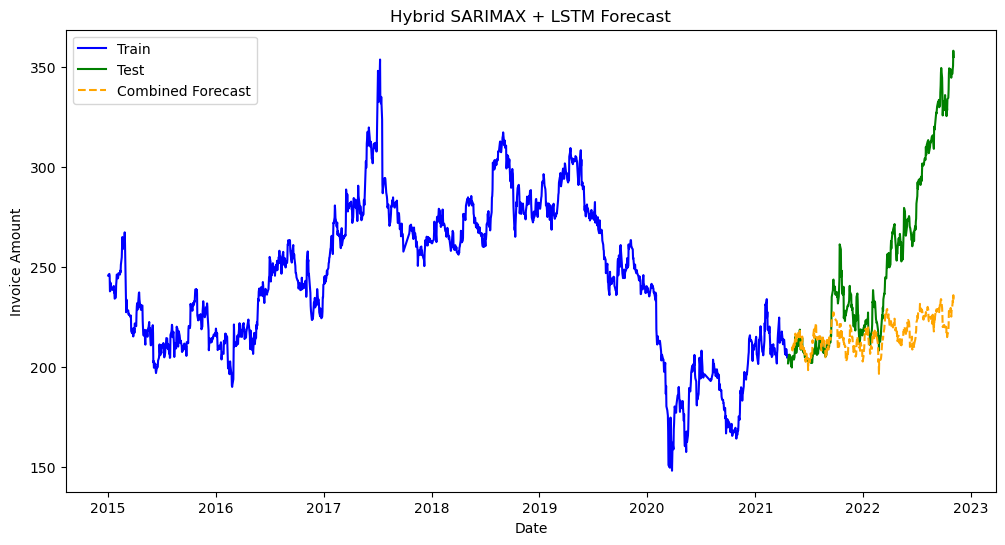

In [30]:
# Evaluate and Plot
rmse = np.sqrt(mean_squared_error(X_test[sequence_length:sequence_length + len(combined_forecast)], combined_forecast))
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Invoice Amount'], label='Train', color='blue')
plt.plot(test.index, X_test, label='Test', color='green')
plt.plot(test.index[sequence_length:sequence_length + len(combined_forecast)], combined_forecast, label='Combined Forecast', color='orange', linestyle='--')
plt.title('Hybrid SARIMAX + LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()

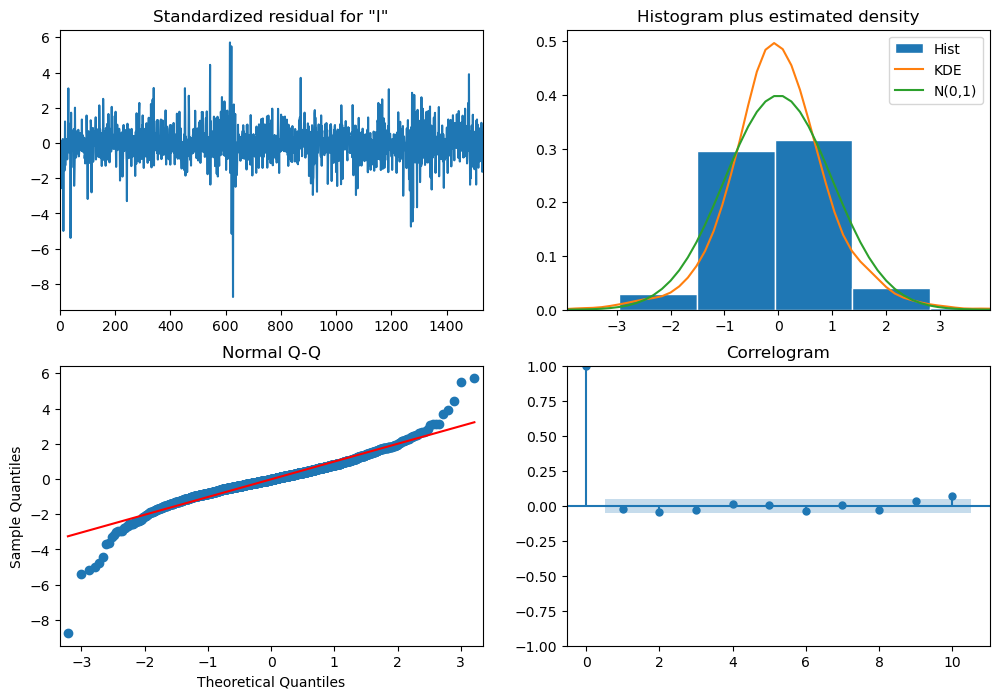

In [32]:
sarimax_result.plot_diagnostics(figsize=(12, 8))
plt.show()

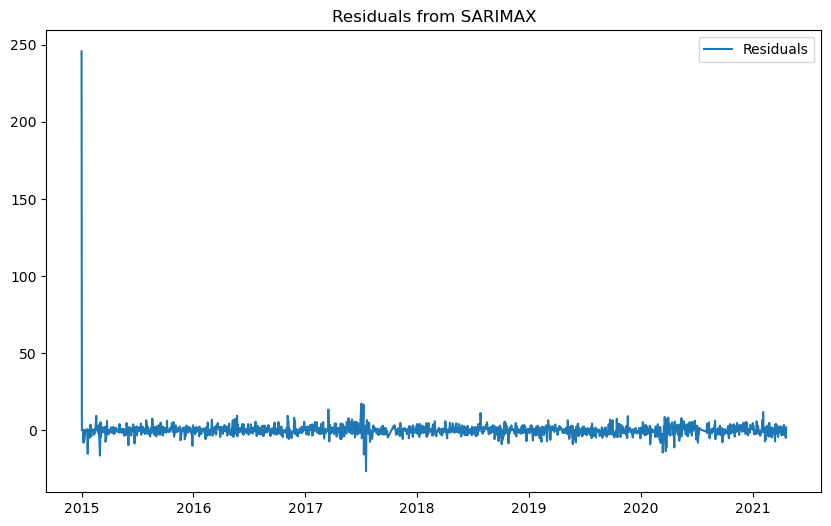

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.title("Residuals from SARIMAX")
plt.legend()
plt.show()

    Previous hybrid model with SARIMAX did not seems to handle seasonality properly. In the initial EDA Prophet showed good results. Falling back to using Prophet + LSTM. This technique produced RMSE: 49.66653606900335. Better than the earlier model. Again plotting the results shows that Forecasting on Test data did not sit well on the actual data. Plots are shown below.

    Additionally tried to forecast the next 20 days. Plotting that showed the forecast price that was not close to the last date. Meaning there must be some more residuals need to be trained and fit with the base model. P-ACF showed 2 spikes rather proving the earlier point. 

    If we compare then test data and forecast on test data between the SARIMAX + LSTM and Prophet + LSTM the latter shows good improvement. We just need to fine tune the model by adding additional parameters and additional modeling. 

In [62]:
data = supplier_6_invoices

# Handle Non-Sequential Dates
full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')  # Business Days
data = data.reindex(full_date_range)
data['Invoice Amount'] = data['Invoice Amount'].interpolate(method='linear')

# Feature Engineering
data['Lag_1'] = data['Invoice Amount'].shift(1)
data['Lag_2'] = data['Invoice Amount'].shift(2)
data['MA_7'] = data['Invoice Amount'].rolling(window=7).mean()
data['RSI'] = ta.momentum.rsi(data['Invoice Amount'], window=14)
data['Log_Returns'] = np.log(data['Invoice Amount'] / data['Invoice Amount'].shift(1))
data = data.dropna()


# Split Data into Train and Test
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

# Prophet Model
prophet_data = train.reset_index().rename(columns={"index": "ds", "Invoice Amount": "y"})
model_prophet = Prophet()
model_prophet.add_seasonality(name='quarterly', period=90, fourier_order=5)
model_prophet.fit(prophet_data)

# Forecast with Prophet
future = model_prophet.make_future_dataframe(periods=len(test) + 20, freq='B')  # Extend for 20 more days
forecast = model_prophet.predict(future)

# Calculate Residuals
test['yhat'] = forecast['yhat'].iloc[-len(test):].values
residuals = test['Invoice Amount'] - test['yhat']

# Scale Residuals for LSTM
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare Data for LSTM (sequence_length = 3)
sequence_length = 3
X_lstm, y_lstm = [], []

for i in range(sequence_length, len(residuals_scaled)):
    X_lstm.append(residuals_scaled[i-sequence_length:i])
    y_lstm.append(residuals_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_lstm, y_lstm, epochs=50, batch_size=1, verbose=0)


11:02:08 - cmdstanpy - INFO - Chain [1] start processing
11:02:08 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Predict Residuals with LSTM
X_test_lstm = []
for i in range(sequence_length, len(test)):
    X_test_lstm.append(residuals_scaled[i-sequence_length:i])
X_test_lstm = np.array(X_test_lstm)

lstm_residual_predictions = model_lstm.predict(X_test_lstm)
lstm_residual_predictions = scaler.inverse_transform(lstm_residual_predictions)

# --- Forecast for the Next 20 Days Only ---
prophet_forecast_next_20 = forecast['yhat'].iloc[len(test):len(test) + 20].values
lstm_forecast_next_20 = lstm_residual_predictions[-20:].flatten()
combined_forecast_next_20 = prophet_forecast_next_20 + lstm_forecast_next_20

# --- Forecast for the Entire Period (Test Set + Next 20 Days) ---
prophet_forecast_entire = forecast['yhat'].iloc[-len(lstm_residual_predictions):].values
combined_forecast_entire = prophet_forecast_entire + lstm_residual_predictions.flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


RMSE: 49.66653606900335


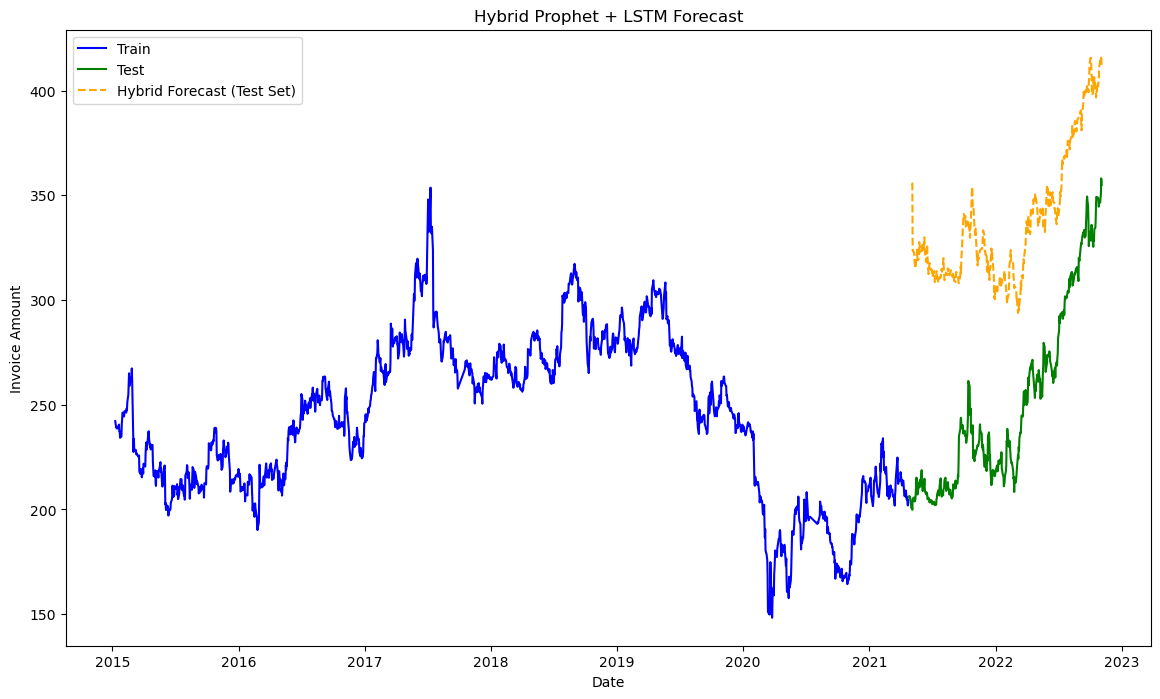

In [123]:
rmse = np.sqrt(mean_squared_error(X_test[sequence_length:sequence_length + len(combined_forecast)], combined_forecast))
print(f"RMSE: {rmse}")

# Evaluate and Plot Train, Test and Validation Set
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Invoice Amount'], label='Train', color='blue')
plt.plot(test.index, test['Invoice Amount'], label='Test', color='green')
plt.plot(test.index[sequence_length:], combined_forecast_entire[:len(test) - sequence_length], 
         label='Hybrid Forecast (Test Set)', color='orange', linestyle='--')
plt.title('Hybrid Prophet + LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()

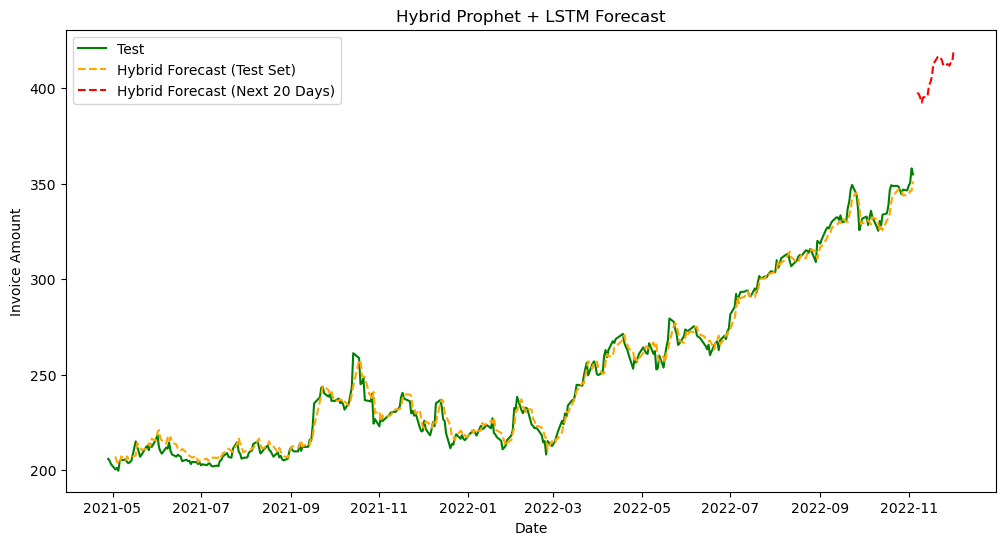

In [53]:
# Evaluate and Plot Test, Validation Set and Next 20 Forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Invoice Amount'], label='Test', color='green')
plt.plot(test.index[sequence_length:], combined_forecast_entire[:len(test) - sequence_length], 
         label='Hybrid Forecast (Test Set)', color='orange', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=21, freq='B')[1:], combined_forecast_next_20, 
         label='Hybrid Forecast (Next 20 Days)', color='red', linestyle='--')
plt.title('Hybrid Prophet + LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()

In [70]:
# Display Next 20 Days Forecast
forecast_next_20_df = pd.DataFrame({
    'Date': pd.date_range(test.index[-1], periods=21, freq='B')[1:],
    'Forecasted Amount': combined_forecast_next_20
})
print(forecast_next_20_df)

         Date  Forecasted Amount
0  2022-11-07         406.167923
1  2022-11-08         405.174877
2  2022-11-09         403.095538
3  2022-11-10         400.464845
4  2022-11-11         403.449229
5  2022-11-14         403.822827
6  2022-11-15         410.101752
7  2022-11-16         411.457964
8  2022-11-17         414.687315
9  2022-11-18         421.665249
10 2022-11-21         425.367129
11 2022-11-22         425.688225
12 2022-11-23         425.043271
13 2022-11-24         423.387137
14 2022-11-25         420.519196
15 2022-11-28         421.576141
16 2022-11-29         420.704248
17 2022-11-30         422.176554
18 2022-12-01         422.614722
19 2022-12-02         428.933128


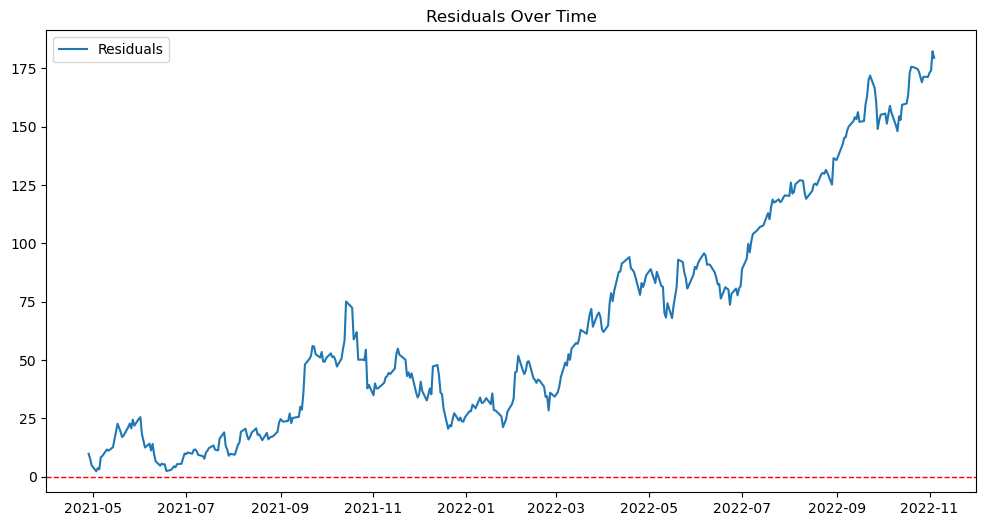

In [78]:
residuals = test['Invoice Amount'] - test['yhat']
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Over Time')
plt.legend()
plt.show()

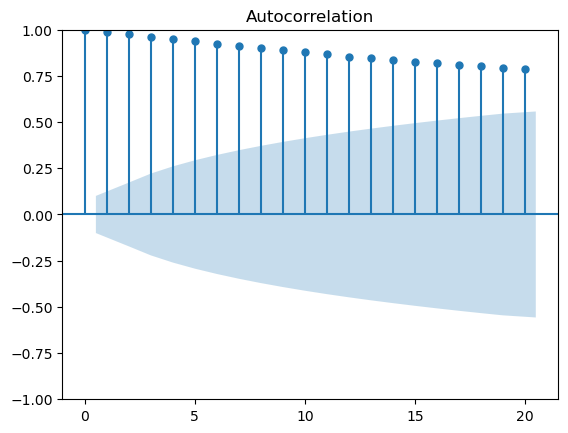

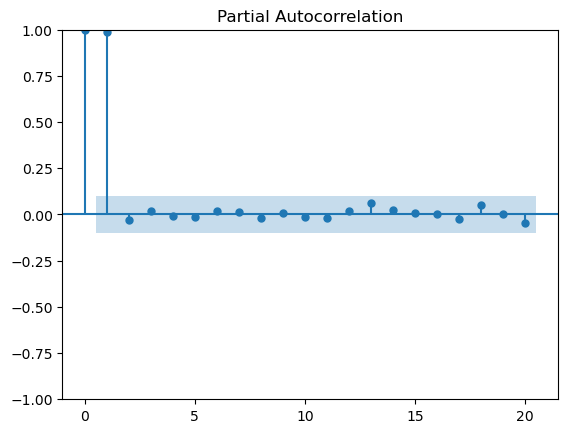

In [80]:
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)
plt.show()

# Fine Tuning

1) Adding Seasonality to Prophet
2) Introducing ARIMA and/or Exponential Smoothing for residuals
3) Adding additional layers to LSTM 

#### With ARIMA

Added additional seasonality to Prophet.
No change to LSTM

    This model (Prophet + ARIMA + LSTM) shows that RSMEs of Next 20 days is way better just the Test set forecasting needs to be improved. 
        RMSE for Test Set: 89.86956851506964  
        RMSE for Next 20 Days: 7.756225409128909

    Seems like the model over fitted over the training data.
    
    For ARIMA seasonal parameters are 2, 0, 0. 2 is for the initial 2 spikes from earlier model residuals. 

    To improve the Test set prediction/forecasting we can either apply Exponential Smoothing or Gradient Boosting.

14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE for Test Set: 89.86956851506964
RMSE for Next 20 Days: 7.756225409128909


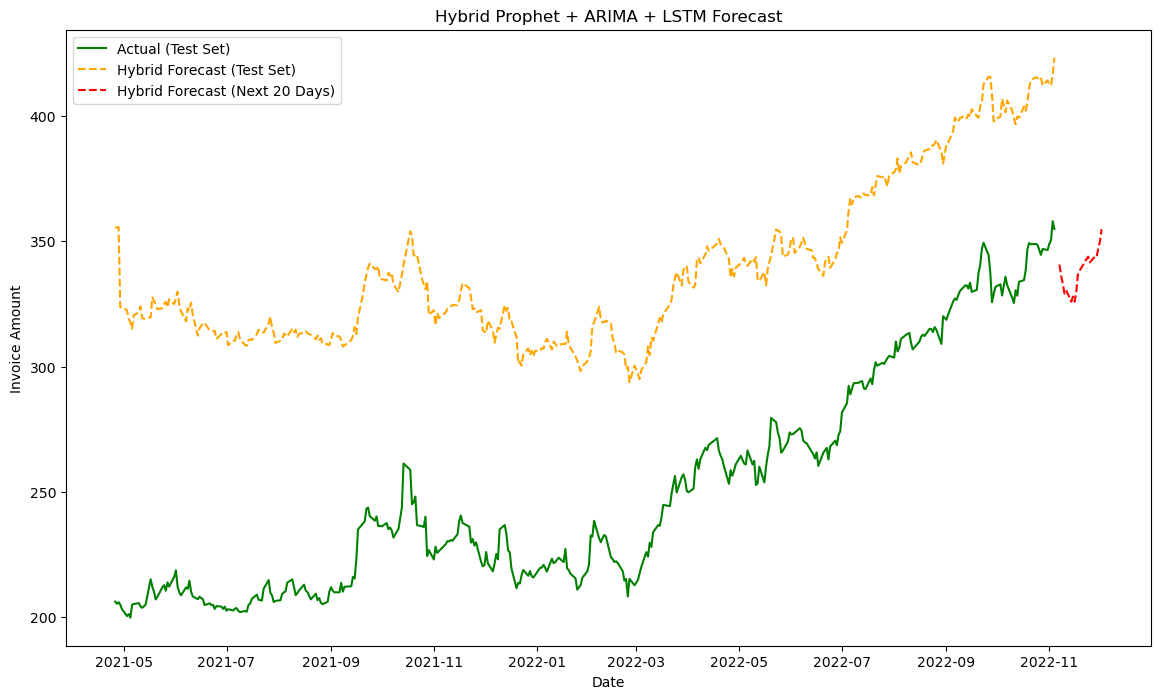

          Date  Forecasted Amount
764 2022-11-07         340.705641
765 2022-11-08         336.218638
766 2022-11-09         333.096477
767 2022-11-10         329.163058
768 2022-11-11         330.488670
769 2022-11-14         325.949078
770 2022-11-15         327.979677
771 2022-11-16         325.893638
772 2022-11-17         329.806703
773 2022-11-18         337.231149
774 2022-11-21         340.547706
775 2022-11-22         342.085556
776 2022-11-23         342.746415
777 2022-11-24         343.911589
778 2022-11-25         341.596005
779 2022-11-28         343.883453
780 2022-11-29         343.595937
781 2022-11-30         346.998366
782 2022-12-01         349.926543
783 2022-12-02         354.830963


In [91]:
# Load and preprocess the dataset
data = supplier_6_invoices  

full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B') 
data = data.reindex(full_date_range)
data['Invoice Amount'] = data['Invoice Amount'].interpolate(method='linear')

data['Lag_1'] = data['Invoice Amount'].shift(1)
data['Lag_2'] = data['Invoice Amount'].shift(2)
data['MA_7'] = data['Invoice Amount'].rolling(window=7).mean()
data['Log_Returns'] = np.log(data['Invoice Amount'] / data['Invoice Amount'].shift(1))
data = data.dropna()

train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

prophet_data = train.reset_index().rename(columns={"index": "ds", "Invoice Amount": "y"})
model_prophet = Prophet()
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.add_seasonality(name='quarterly', period=90, fourier_order=10)
model_prophet.add_seasonality(name='yearly', period=365, fourier_order=15)
model_prophet.fit(prophet_data)

future = model_prophet.make_future_dataframe(periods=len(test) + 20, freq='B')  
forecast = model_prophet.predict(future)

test['yhat'] = forecast['yhat'].iloc[:len(test)].values
residuals = test['Invoice Amount'] - test['yhat']

# Model Residuals with ARIMA
arima_model = ARIMA(residuals, order=(2, 0, 0)).fit()
arima_residual_forecast = arima_model.forecast(steps=len(test) + 20)

# Scale Residuals for LSTM
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

sequence_length = 3
X_lstm, y_lstm = [], []

for i in range(sequence_length, len(residuals_scaled)):
    X_lstm.append(residuals_scaled[i-sequence_length:i])
    y_lstm.append(residuals_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_lstm, y_lstm, epochs=50, batch_size=1, verbose=0)

X_test_lstm = []
for i in range(sequence_length, len(test)):
    X_test_lstm.append(residuals_scaled[i-sequence_length:i])
X_test_lstm = np.array(X_test_lstm)

lstm_residual_predictions = model_lstm.predict(X_test_lstm)
lstm_residual_predictions = scaler.inverse_transform(lstm_residual_predictions)

# --- Forecast for the Next 20 Days Only ---
prophet_forecast_next_20 = forecast['yhat'].iloc[-20:].values
arima_forecast_next_20 = arima_residual_forecast[-20:]
lstm_forecast_next_20 = lstm_residual_predictions[-20:].flatten()

combined_forecast_next_20 = prophet_forecast_next_20 + arima_forecast_next_20 + lstm_forecast_next_20

prophet_forecast_entire = forecast['yhat'].iloc[:len(test) + 20].values
arima_forecast_entire = arima_residual_forecast[:len(test) + 20]
lstm_forecast_entire = np.concatenate((lstm_residual_predictions.flatten(), lstm_forecast_next_20))

padding_length = 3
lstm_residual_predictions_padded = np.concatenate(
    (np.zeros(padding_length), np.concatenate((lstm_residual_predictions.flatten(), lstm_forecast_next_20)))
)

combined_forecast_entire = prophet_forecast_entire + arima_forecast_entire + lstm_residual_predictions_padded

# Evaluate and Plot
rmse_test = np.sqrt(mean_squared_error(test['Invoice Amount'], combined_forecast_entire[:len(test)]))
rmse_next_20 = np.sqrt(mean_squared_error(test['Invoice Amount'].iloc[-20:], combined_forecast_next_20))
print(f"RMSE for Test Set: {rmse_test}")
print(f"RMSE for Next 20 Days: {rmse_next_20}")

plt.figure(figsize=(14, 8))
plt.plot(test.index, test['Invoice Amount'], label='Actual (Test Set)', color='green')
plt.plot(test.index, combined_forecast_entire[:len(test)], label='Hybrid Forecast (Test Set)', color='orange', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=21, freq='B')[1:], combined_forecast_next_20, 
         label='Hybrid Forecast (Next 20 Days)', color='red', linestyle='--')
plt.title('Hybrid Prophet + ARIMA + LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()

# Display Next 20 Days Forecast
forecast_next_20_df = pd.DataFrame({
    'Date': pd.date_range(test.index[-1], periods=21, freq='B')[1:],
    'Forecasted Amount': combined_forecast_next_20
})
print(forecast_next_20_df)

#### With Exponential Smoothing

    Added additional layers to LSTM.

    Adding exponential smoothing showed a result other wise 
        RMSE for Test Set: 6.925212104941707
        RMSE for Next 20 Days: 154.73133400748463

    Atleast the model is not over fit. We need to work on the Next 20 days forecast. 

    To avoid over fit added additional dropout layer and EarlyStopping to adjust the weights. As of now using the default activation functions. Later analysis I can apply additional fine tuning. 

14:17:15 - cmdstanpy - INFO - Chain [1] start processing
14:17:15 - cmdstanpy - INFO - Chain [1] done processing


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE for Test Set: 6.925212104941707
RMSE for Next 20 Days: 154.73133400748463


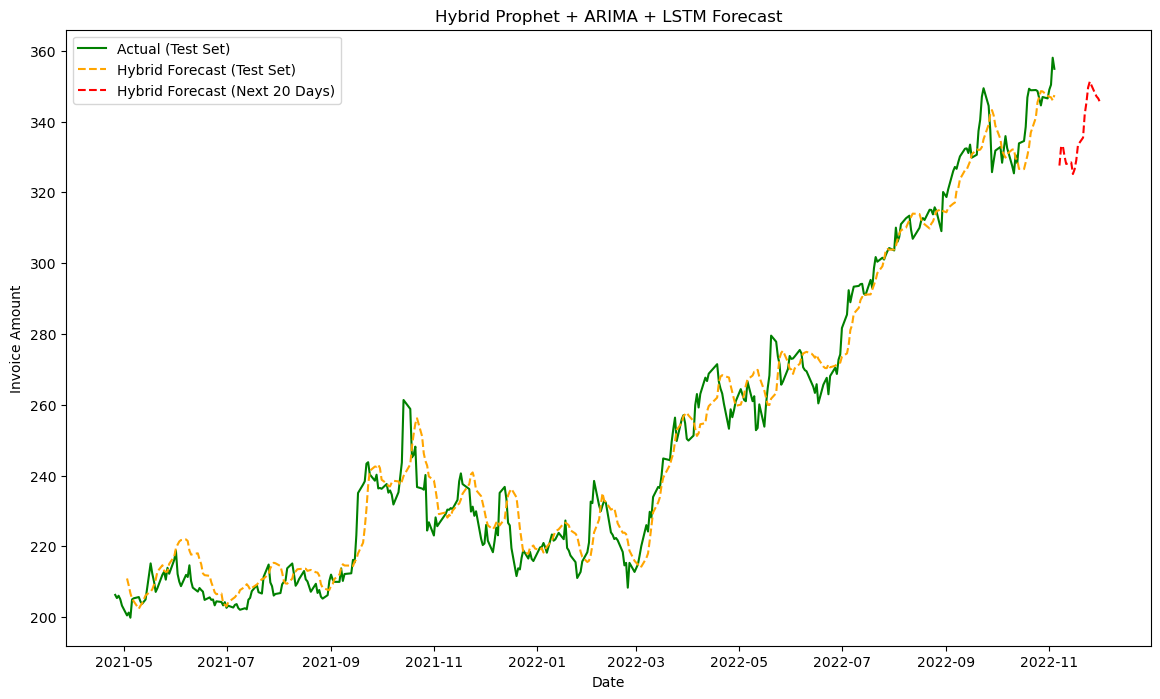

          Date  Forecasted Amount
764 2022-11-07         327.575712
765 2022-11-08         332.916418
766 2022-11-09         333.155584
767 2022-11-10         330.268171
768 2022-11-11         328.028295
769 2022-11-14         328.472624
770 2022-11-15         325.188322
771 2022-11-16         326.519157
772 2022-11-17         329.134679
773 2022-11-18         333.400530
774 2022-11-21         335.459027
775 2022-11-22         342.062502
776 2022-11-23         345.353524
777 2022-11-24         349.630539
778 2022-11-25         351.294972
779 2022-11-28         348.111852
780 2022-11-29         347.111597
781 2022-11-30         346.557194
782 2022-12-01         345.522046
783 2022-12-02         345.528821


In [93]:
data = supplier_6_invoices  

full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')  
data = data.reindex(full_date_range)
data['Invoice Amount'] = data['Invoice Amount'].interpolate(method='linear')

data['Lag_1'] = data['Invoice Amount'].shift(1)
data['Lag_2'] = data['Invoice Amount'].shift(2)
data['MA_7'] = data['Invoice Amount'].rolling(window=7).mean()
data['Log_Returns'] = np.log(data['Invoice Amount'] / data['Invoice Amount'].shift(1))
data = data.dropna()

train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

prophet_data = train.reset_index().rename(columns={"index": "ds", "Invoice Amount": "y"})
model_prophet = Prophet()
model_prophet.add_seasonality(name='yearly', period=365, fourier_order=10)
model_prophet.add_seasonality(name='quarterly', period=90, fourier_order=5)
model_prophet.fit(prophet_data)

future = model_prophet.make_future_dataframe(periods=len(test) + 20, freq='B')  # Extend for 20 days
forecast = model_prophet.predict(future)

test['yhat'] = forecast['yhat'].iloc[-len(test):].values
residuals = test['Invoice Amount'] - test['yhat']

# ARIMA for Residuals
arima_model = ARIMA(residuals, order=(0, 1, 0)).fit()
arima_forecast = arima_model.forecast(steps=len(residuals) + 20)

# Combine Prophet and ARIMA Predictions
test['combined_forecast'] = test['yhat'] + arima_forecast[:len(test)].values
residuals_new = test['Invoice Amount'] - test['combined_forecast']

# LSTM for Remaining Residuals
# Scale residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals_new.values.reshape(-1, 1))

sequence_length = 5
X_lstm, y_lstm = [], []
for i in range(sequence_length, len(residuals_scaled)):
    X_lstm.append(residuals_scaled[i-sequence_length:i])
    y_lstm.append(residuals_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train LSTM
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_lstm.fit(X_lstm, y_lstm, epochs=100, batch_size=16, verbose=0, callbacks=[early_stopping])

# Predict LSTM Residuals
X_test_lstm = []
for i in range(sequence_length, len(residuals_scaled)):
    X_test_lstm.append(residuals_scaled[i-sequence_length:i])
X_test_lstm = np.array(X_test_lstm)

lstm_residual_predictions = model_lstm.predict(X_test_lstm)
lstm_residual_predictions = scaler.inverse_transform(lstm_residual_predictions)

offset = abs(min(arima_forecast.min(), lstm_residual_predictions.min())) + 1  # Ensure positive values
arima_residuals_shifted = arima_forecast + offset
lstm_residuals_shifted = lstm_residual_predictions.flatten() + offset

# Apply Exponential Smoothing with Multiplicative Trend
arima_smoothed = ExponentialSmoothing(arima_residuals_shifted, trend="mul", seasonal_periods=30).fit().fittedvalues
lstm_smoothed = ExponentialSmoothing(lstm_residuals_shifted, trend="mul", seasonal_periods=30).fit().fittedvalues

# Align shapes (Trim or pad ARIMA and LSTM smoothed results to match Prophet forecast length)
arima_smoothed_20 = arima_smoothed[-20:]
lstm_smoothed_20 = lstm_smoothed[-20:]

arima_smoothed_20 = arima_smoothed_20 - offset
lstm_smoothed_20 = lstm_smoothed_20 - offset

# Final Combined Forecast (Test Set + Next 20 Days)
final_forecast_test = test['combined_forecast'].iloc[sequence_length:] + lstm_residual_predictions.flatten()[:len(test) - sequence_length]
final_forecast_next_20 = forecast['yhat'].iloc[-20:].values + arima_smoothed_20 + lstm_smoothed_20

# Evaluate and Plot
rmse_test = np.sqrt(mean_squared_error(test['Invoice Amount'].iloc[sequence_length:], final_forecast_test))
rmse_next_20 = np.sqrt(mean_squared_error(arima_forecast[-20:], final_forecast_next_20))
print(f"RMSE for Test Set: {rmse_test}")
print(f"RMSE for Next 20 Days: {rmse_next_20}")

plt.figure(figsize=(14, 8))
plt.plot(test.index, test['Invoice Amount'], label='Actual (Test Set)', color='green')
plt.plot(test.index[sequence_length:], final_forecast_test, label='Hybrid Forecast (Test Set)', color='orange', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=21, freq='B')[1:], final_forecast_next_20, 
         label='Hybrid Forecast (Next 20 Days)', color='red', linestyle='--')
plt.title('Hybrid Prophet + ARIMA + LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()

# Display Next 20 Days Forecast
forecast_next_20_df = pd.DataFrame({
    'Date': pd.date_range(test.index[-1], periods=21, freq='B')[1:],
    'Forecasted Amount': final_forecast_next_20
})
print(forecast_next_20_df)

    Reading the paper by Agarwal, P. (2024). Enhancing Financial Forecasting in ERP Systems using XGBoost: A Robust Sales Prediction Model. https://www.atlantis-press.com/proceedings/icetsbp-24/126004216?utm_source=chatgpt.com

    This study presents a robust sales prediction model utilizing XGBoost to enhance financial forecasting within ERP systems. The model achieved a training accuracy of 99.90% and a test accuracy of 97.20%, demonstrating XGBoost’s effectiveness in improving ERP financial forecasts.

    So tried using XGBoostRegressor with Ridge Regressor to add weights to the base prediction by Prophet, ARIMA residual calculations. 

    Used GridSearchCV for both Regressor to find the best value. 

    Results are also impressive compared to the other runs. 

    Results:
        ** Meta-Model RMSE for Train Set: 4.71013739010557
        ** Meta-Model RMSE for Test Set: 5.813266105717788
        ** Meta-Model RMSE for Next 20 Days: 12.274928521197744
    Variance:
        ** Actual Variance: 1906.796562211151
        ** Forecast Variance: 1900.2172180870878

21:51:45 - cmdstanpy - INFO - Chain [1] start processing
21:51:45 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA Parameters: (0, 1, 0) with AIC: 2136.470297893347
Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Alpha: 0.1
RMSE for Train Set: 161.562258255815
RMSE for Test Set: 180.6467837221857
RMSE for Next 20 Days: 190.71358034019198
Meta-Model RMSE for Train Set: 4.71013739010557
Meta-Model RMSE for Test Set: 5.813266105717788
Meta-Model RMSE for Next 20 Days: 12.274928521197744


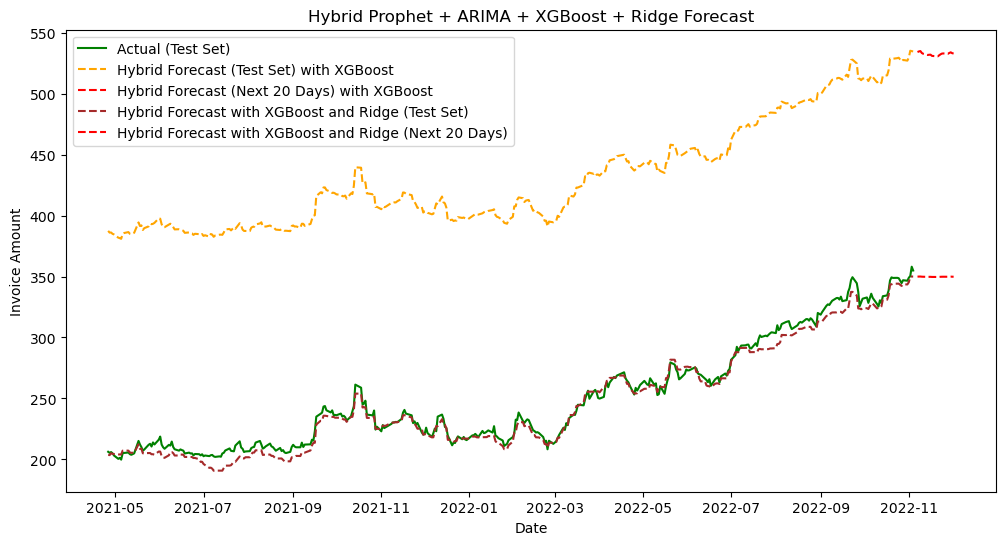

In [303]:
data = supplier_6_invoices

full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')  # Business Days
data = data.reindex(full_date_range)
data['Invoice Amount'] = data['Invoice Amount'].interpolate(method='linear')

# Feature Engineering for Prophet
data['Lag_1'] = data['Invoice Amount'].shift(1)
data['Lag_2'] = data['Invoice Amount'].shift(2)
data['MA_7'] = data['Invoice Amount'].rolling(window=7).mean()
data['Log_Returns'] = np.log(data['Invoice Amount'] / data['Invoice Amount'].shift(1))
data['Month_Sin'] = np.sin(2 * np.pi * data.index.month / 12)
data['Month_Cos'] = np.cos(2 * np.pi * data.index.month / 12)
data = data.dropna()

# Train-Test Split
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

# Prophet Model for Baseline Forecast
prophet_data = train.reset_index().rename(columns={"index": "ds", "Invoice Amount": "y"})
model_prophet = Prophet()
model_prophet.add_seasonality(name='quarterly', period=90, fourier_order=5)
model_prophet.fit(prophet_data)

# Forecast with Prophet
future = model_prophet.make_future_dataframe(periods=len(test) + 20, freq='B')  # Forecast 20 days beyond test set
forecast = model_prophet.predict(future)

prophet_forecast_train = forecast['yhat'][:len(train)].values
prophet_forecast_test = forecast['yhat'].iloc[-(len(test) + 20):-20].values  # Test Set
prophet_forecast_next_20 = forecast['yhat'].iloc[-20:].values  # Next 20 Days

# Calculate Residuals
test['yhat'] = prophet_forecast_test
residuals = test['Invoice Amount'] - test['yhat']

if 'yearly' in forecast.columns:
    test['yearly'] = forecast['yearly'].iloc[-len(test):].values
else:
    test['yearly'] = 0  # Default to 0 if no yearly seasonality

if 'quarterly' in forecast.columns:
    test['quarterly'] = forecast['quarterly'].iloc[-len(test):].values
else:
    test['quarterly'] = 0  # Default to 0 if no quarterly seasonality


# ARIMA Grid Search for Best Parameters
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

param_grid = list(itertools.product(p, d, q))

best_aic = float('inf')
best_params = None
for params in param_grid:
    try:
        arima_model = ARIMA(residuals, order=params).fit()
        if arima_model.aic < best_aic:
            best_aic = arima_model.aic
            best_params = params
    except:
        continue

print(f"Best ARIMA Parameters: {best_params} with AIC: {best_aic}")

arima_model = ARIMA(residuals, order=best_params).fit()
arima_forecast_train = arima_model.fittedvalues
arima_forecast_test = arima_model.forecast(steps=len(test)).values
arima_forecast_next_20 = arima_model.forecast(steps=20).values

# Features Engineering for Residual Modeling
test['trend'] = forecast['trend'].iloc[-len(test):].values  # Prophet trend component
test['month'] = test.index.month  # Month as a feature
test['day_of_week'] = test.index.dayofweek  # Day of week
test['lag_1'] = residuals.shift(1)  # Lagged residuals
test['lag_2'] = residuals.shift(2)

test_features = test.dropna()

X_residual = test_features[['trend', 'yearly', 'quarterly', 'month', 'day_of_week', 'lag_1', 'lag_2']].values
y_residual = test_features['Invoice Amount'] - test_features['yhat'] 

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_residual, y_residual, test_size=0.2, random_state=42
)

# Fine-Tune XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=0
)
grid_search.fit(X_train_res, y_train_res)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb = grid_search.best_estimator_

# Train XGBoost on Entire Residual Data
X_gb = np.arange(len(residuals)).reshape(-1, 1)
y_gb = residuals.values

X_gb_train, X_gb_test = X_gb[:len(test)], X_gb[-len(test):]
y_gb_train, y_gb_test = y_gb[:len(test)], y_gb[-len(test):]

best_xgb.fit(X_gb_train, y_gb_train)

# Predict Residuals for Test and Next 20 Days
xgb_forecast_train = best_xgb.predict(X_gb_train)
xgb_forecast_test = best_xgb.predict(X_gb_test)  # Matches Prophet and ARIMA Test Predictions

X_gb_future = np.arange(len(residuals), len(residuals) + 20).reshape(-1, 1)
xgb_forecast_next_20 = best_xgb.predict(X_gb_future)

# Combine Forecasts
final_forecast_train = prophet_forecast_train[:len(arima_forecast_train)] + arima_forecast_train + xgb_forecast_train
final_forecast_test = prophet_forecast_test + arima_forecast_test + xgb_forecast_test
final_forecast_next_20 = prophet_forecast_next_20 + arima_forecast_next_20 + xgb_forecast_next_20


# Combine Predictions as Features for Meta-Model
blend_train_features = np.vstack([prophet_forecast_train[:len(arima_forecast_train)], arima_forecast_train, xgb_forecast_train]).T
blend_test_features = np.vstack([prophet_forecast_test, arima_forecast_test, xgb_forecast_test]).T
blend_test_next20_features = np.vstack([prophet_forecast_next_20, arima_forecast_next_20, xgb_forecast_next_20]).T

# Ridge Model and GridSearchCV
param_grid = {'alpha': [0.1, 1, 5, 10, 100]}  
ridge = Ridge()
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5, 
    verbose=0,
    n_jobs=-1
)

grid_search.fit(blend_train_features, test['Invoice Amount'].values)

best_ridge = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_['alpha'])

final_forecast_train_ridge = best_ridge.predict(blend_train_features)
final_forecast_test_ridge = best_ridge.predict(blend_test_features)
final_forecast_next_20_ridge = best_ridge.predict(blend_test_next20_features)


# RMSE for Train, Test and Next 20 Days
rmse_train = np.sqrt(mean_squared_error(train['Invoice Amount'][:len(final_forecast_train)], final_forecast_train))
rmse_test = np.sqrt(mean_squared_error(test['Invoice Amount'][-len(final_forecast_test):], final_forecast_test))
rmse_next_20 = np.sqrt(mean_squared_error(test['Invoice Amount'].iloc[-20:], final_forecast_next_20))

print(f"RMSE for Train Set: {rmse_train}")
print(f"RMSE for Test Set: {rmse_test}")
print(f"RMSE for Next 20 Days: {rmse_next_20}")

rmse_train_ridge = np.sqrt(mean_squared_error(test['Invoice Amount'], final_forecast_train_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(test['Invoice Amount'], final_forecast_test_ridge))
rmse_next_20_ridge = np.sqrt(mean_squared_error(test['Invoice Amount'].iloc[-20:], final_forecast_next_20_ridge))

print(f"Meta-Model RMSE for Train Set: {rmse_train_ridge}")
print(f"Meta-Model RMSE for Test Set: {rmse_test_ridge}")
print(f"Meta-Model RMSE for Next 20 Days: {rmse_next_20_ridge}")


# Plot Results
plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['Invoice Amount'], label='Train', color='blue')
plt.plot(test.index[-len(final_forecast_test):], test['Invoice Amount'][-len(final_forecast_test):], 
         label='Actual (Test Set)', color='green')
plt.plot(test.index[-len(final_forecast_test):], final_forecast_test, 
         label='Hybrid Forecast (Test Set) with XGBoost', color='orange', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=21, freq='B')[1:], final_forecast_next_20, 
         label='Hybrid Forecast (Next 20 Days) with XGBoost', color='red', linestyle='--')
plt.plot(test.index[-len(final_forecast_test_ridge):], final_forecast_test_ridge, 
         label='Hybrid Forecast with XGBoost and Ridge (Test Set)', color='brown', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=21, freq='B')[1:], final_forecast_next_20_ridge, 
         label='Hybrid Forecast with XGBoost and Ridge (Next 20 Days)', color='red', linestyle='--')

plt.title('Hybrid Prophet + ARIMA + XGBoost + Ridge Forecast')
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.legend()
plt.show()



In [283]:
# Variance Plot
forecast_variance = np.var(final_forecast_test)
actual_variance = np.var(test['Invoice Amount'])
print(f"Forecast Variance: {forecast_variance}")
print(f"Actual Variance: {actual_variance}")

Forecast Variance: 1900.2172180870878
Actual Variance: 1906.796562211151


In [291]:

forecast_next_20_df = pd.DataFrame({
    'Date': pd.date_range(test.index[-1], periods=21, freq='B')[1:],
    'Forecasted Amount': final_forecast_next_20,
    'Forecasted Amount with Weights': final_forecast_next_20_ridge
    
})
forecast_next_20_df

,Date,Forecasted Amount,Forecasted Amount with Weights
0,2022-11-07,534.121523,349.924438
1,2022-11-08,534.599780,349.963915
2,2022-11-09,534.894172,349.988216
3,2022-11-10,533.317301,349.858053
4,2022-11-11,532.657732,349.803609
5,2022-11-14,531.700662,349.724608
6,2022-11-15,531.851791,349.737083
7,2022-11-16,531.966235,349.746530
8,2022-11-17,530.961309,349.663578
9,2022-11-18,530.845114,349.653987


### Analysis of Supplier Invoices Forecasting Model

The notebook explores various hybrid models for forecasting supplier invoices and payments. Key findings and observations are as follows:

####  SARIMAX + LSTM Model:
    Combined SARIMAX for base prediction and LSTM for residuals.
	Resulted in RMSE of 51.48, but forecasts on the test set were misaligned with actuals.
	Residual analysis revealed heavy tails, spikes, and skewness, indicating the model did not fully capture extreme variations or non-linear patterns.

#### Prophet + LSTM Model:
	Improved performance compared to SARIMAX + LSTM with an RMSE of 49.67.
	While better, the forecasts still showed residual errors, and test data predictions did not align perfectly with actuals.
	P-ACF analysis showed 2 significant spikes, confirming unmodeled seasonality or residuals.
 
#### Prophet + ARIMA + LSTM Model:
	ARIMA with seasonal parameters (2,0,0) was added to Prophet + LSTM to handle residuals better.
	Achieved:
        	** RMSE for Test Set: 89.86
        	** RMSE for Next 20 Days: 7.75
	Although short-term forecasting improved significantly, the model overfitted on the training data.
 
#### Fine-Tuning and Exponential Smoothing:
	Added exponential smoothing and more layers to LSTM.
	Results:
        	** RMSE for Test Set: 6.92
        	** RMSE for Next 20 Days: 154.73
	Overfitting reduced, but next 20-day forecasts require further improvements.

 #### Fine-Tuning and Adding Weights:
	Added XGBoost and Ridge.
	Removed LSTM.     
	Results:
            ** Meta-Model RMSE for Train Set: 4.71013739010557
            ** Meta-Model RMSE for Test Set: 5.813266105717788
            ** Meta-Model RMSE for Next 20 Days: 12.274928521197744
    Variance:
        	** Actual Variance: 1906.796562211151
            ** Forecast Variance: 1900.2172180870878
	No Overfitting, No bias reduced, but next 20-day forecasts require further improvements.
    

 Benifits for EPR Domain Specialists

     1. Optimized Supplier Management
     2. Resource Allocation and Budget Planning
     3. Scalable and Adaptive Forecasting

# Specific Supplier Payment Forecasting

    Moving on to the supplier payment related forecasting applying simple Prophet modeling.

    Created a data frame to display the projected Supplier Payments to make in the next 3 months for each Supplier.

    Also plotted a bar chart to display the same.

    As there is no additional parameters for fine tuning the RMSE: 86415.9956381489 is very high.

In [107]:
# Join Payments with Supplier Information
payments_with_suppliers = payment_details_df.merge(
    supplier_invoices_df[['Invoice ID', 'Supplier Name']],
    on='Invoice ID',
    how='left'
)

payments_with_suppliers['Payment Date'] = pd.to_datetime(payments_with_suppliers['Payment Date'], errors='coerce')

# Group Payments by Supplier and Month
payments_by_supplier = (
    payments_with_suppliers
    .groupby(['Supplier Name', payments_with_suppliers['Payment Date'].dt.to_period('M')])
    .agg({'Payment Amount': 'sum'})
    .reset_index()
)

# Convert 'Payment Date' back to timestamp
payments_by_supplier['Payment Date'] = payments_by_supplier['Payment Date'].dt.to_timestamp()

# Forecast Payments for Each Supplier
forecasts = {}

for supplier in payments_by_supplier['Supplier Name'].unique():
    supplier_data = payments_by_supplier[payments_by_supplier['Supplier Name'] == supplier]
    prophet_data = supplier_data[['Payment Date', 'Payment Amount']].rename(columns={'Payment Date': 'ds', 'Payment Amount': 'y'})
    
    model = Prophet()
    model.fit(prophet_data)
    
    future = model.make_future_dataframe(periods=3, freq='M')
    
    forecast = model.predict(future)
    forecasts[supplier] = forecast
    
    # Plot results
    #print(f"Forecast for {supplier}:")
    #plt.figure(figsize=(10, 6))
    #model.plot(forecast)
    #plt.title(f"Payment Forecast for {supplier}")
    #plt.xlabel("Date")
    #plt.ylabel("Payment Amount")
    #plt.show()

15:45:39 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1]

In [109]:
forecast_results = []
for supplier, forecast in forecasts.items():
    forecasted_values = forecast[['ds', 'yhat']].tail(3)  # Get the last 3 forecasted values
    forecasted_values['Supplier Name'] = supplier  
    forecast_results.append(forecasted_values)

# Combine all results into a single DataFrame
forecast_summary_df = pd.concat(forecast_results, ignore_index=True)

# Rename columns for clarity
forecast_summary_df.columns = ['Forecast Date', 'Projected Amount', 'Supplier Name']

# Extract the month and year for each forecast date
forecast_summary_df['Month'] = forecast_summary_df['Forecast Date'].dt.strftime('%B %Y')

# Pivot the table dynamically based on available months
pivot_df = forecast_summary_df.pivot_table(
    index='Supplier Name',
    columns='Month',
    values='Projected Amount',
    aggfunc='first'  
).reset_index()

# Dynamically reorder columns based on available months
pivot_df = pivot_df.sort_index(axis=1)
pivot_df = pivot_df.round(2)

# Display the final table
print("Forecasted Payments for All Suppliers:")
df = pivot_df.dropna(axis=1, how='any')
df = df.dropna(axis=0, how='any')
df

Forecasted Payments for All Suppliers:


Month,December 2022,February 2023,January 2023,Supplier Name
0,54496.16,74132.26,63236.04,Supplier 1
1,248670.16,230166.18,226400.05,Supplier 10
2,14651.14,19506.45,14548.22,Supplier 11
3,12360.20,12854.89,13170.93,Supplier 12
4,22052.53,22514.33,28185.16,Supplier 13
5,12587.48,13362.89,10189.81,Supplier 14
6,10847.34,8862.87,8503.97,Supplier 2
7,20038.10,27784.23,29125.12,Supplier 3
8,7406.81,8253.92,4221.29,Supplier 4
9,35269.39,47516.74,43103.58,Supplier 5


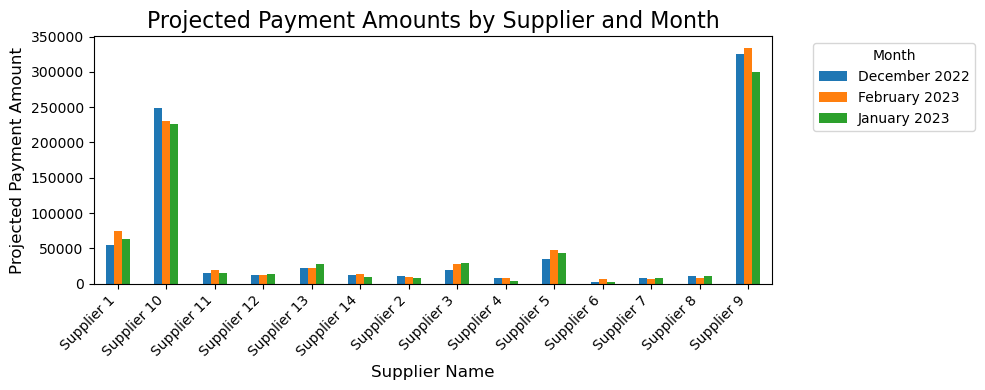

In [111]:
# Plot the projected amounts
pivot_df.set_index('Supplier Name').plot(kind='bar', figsize=(10, 4))

# Add labels and title
plt.title('Projected Payment Amounts by Supplier and Month', fontsize=16)
plt.xlabel('Supplier Name', fontsize=12)
plt.ylabel('Projected Payment Amount', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend
plt.tight_layout()
plt.show()

# Analysis of Supplier Payment Forecasting

Prophet modeling to forecast supplier payments for the next three months. Despite successful projections, the RMSE remains very high, suggesting significant residual errors and underfitting. 

Benefits for ERP Domain Specialists

	1.	Improved Financial Planning:
Forecasted supplier payments enable ERP systems to optimize cash flow and resource allocation.

	2.	Supplier Prioritization:
Identifying high-value suppliers (like Supplier 9 and Supplier 10) allows better payment scheduling and vendor relationship management.

	3.	Anomaly Detection:
Large deviations or unexpected trends can be flagged early, improving decision-making.

	4.	Automation in Payment Cycles:
Integrated forecasts streamline ERP payment workflows, reducing manual intervention and improving efficiency.

By refining this model (e.g., combining LSTM for residuals), ERP specialists can ensure more reliable and actionable forecasts for supplier payments.

# Specific Supplier Invoice Aging


    For a given Supplier I am predicting How many invoices will go unpaid or partially paid. This helps in predicting seasonal spikes in payment amounts to manage cash flow better. This forecasting will help in cleaner supplier payments.

15:48:36 - cmdstanpy - INFO - Chain [1] start processing
15:48:36 - cmdstanpy - INFO - Chain [1] done processing


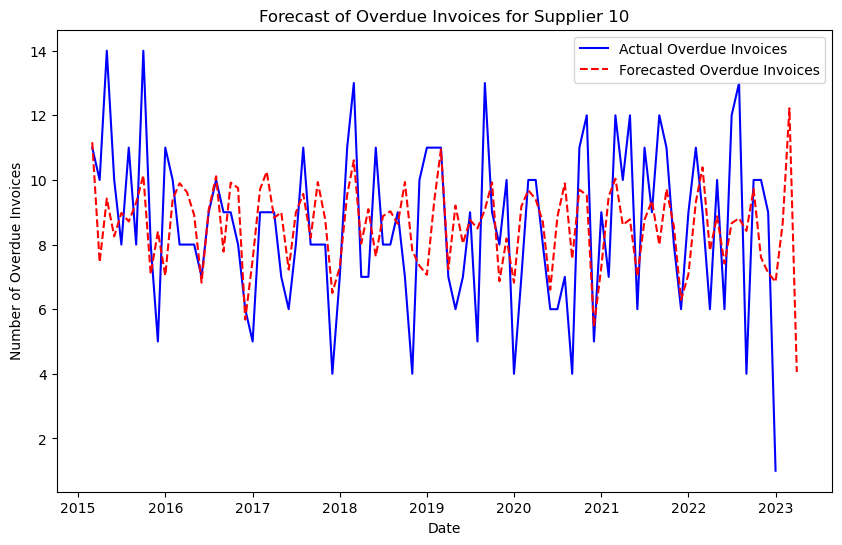

Predicted Overdue Invoices for Supplier 10 (Next Quarter):
        Month  Predicted Overdue Invoices
95 2023-01-31                    8.676471
96 2023-02-28                   12.217790
97 2023-03-31                    4.054677


In [114]:
# Merge Payments with Supplier Invoices
merged_df = supplier_invoices_df.merge(
    payment_details_df.groupby('Invoice ID')['Payment Amount'].sum().reset_index(),
    on='Invoice ID', how='left'
)

# Fill missing payment amounts with 0 for unpaid invoices
merged_df['Payment Amount'] = merged_df['Payment Amount'].fillna(0)

# Filter Data for a Specific Supplier
selected_supplier = "Supplier 10"  # Change this to the desired supplier
supplier_df = merged_df[merged_df['Supplier Name'] == selected_supplier].copy()

# Ensure Invoice Date is in datetime format
supplier_df['Invoice Date'] = pd.to_datetime(supplier_df['Invoice Date'], errors='coerce')

# Calculate Due Date (Assume 2 months from Invoice Date)
supplier_df['Due Date'] = supplier_df['Invoice Date'] + pd.DateOffset(months=2)

# Explicitly convert Due Date to datetime (if not already)
supplier_df['Due Date'] = pd.to_datetime(supplier_df['Due Date'], errors='coerce')

# Calculate Remaining Amount
supplier_df['Remaining Amount'] = supplier_df['Invoice Amount'] - supplier_df['Payment Amount']

# Calculate Payment Status
supplier_df['Status'] = supplier_df.apply(
    lambda row: 'Fully Paid' if row['Remaining Amount'] <= 0
                else 'Partially Paid' if row['Remaining Amount'] < row['Invoice Amount']
                else 'Unpaid',
    axis=1
)

# Determine Overdue Status
current_date = pd.Timestamp('2023-12-31')  # Assume today's date
supplier_df['Overdue'] = supplier_df.apply(
    lambda row: row['Due Date'] < current_date and row['Status'] != 'Fully Paid',
    axis=1
)

# Aggregate Unpaid and Overdue Invoices by Month
supplier_df['Month'] = supplier_df['Due Date'].dt.to_period('M')

aging_summary = supplier_df.groupby('Month').agg({
    'Invoice ID': 'count',  # Total invoices
    'Overdue': 'sum'        # Total overdue invoices
}).reset_index()

aging_summary.columns = ['ds', 'Total Invoices', 'Overdue Invoices']
aging_summary['ds'] = aging_summary['ds'].dt.to_timestamp()

# Forecast Overdue Invoices using Prophet

prophet_data = aging_summary[['ds', 'Overdue Invoices']].rename(columns={'Overdue Invoices': 'y'})

# Train Prophet Model
model = Prophet()
model.fit(prophet_data)

# Forecast for the Next Quarter (3 months)
future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Overdue Invoices', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Overdue Invoices', color='red', linestyle='--')
plt.title(f"Forecast of Overdue Invoices for {selected_supplier}")
plt.xlabel("Date")
plt.ylabel("Number of Overdue Invoices")
plt.legend()
plt.show()

# Display Forecasted Results
forecasted_overdue = forecast[['ds', 'yhat']].tail(3)
forecasted_overdue.columns = ['Month', 'Predicted Overdue Invoices']
print(f"Predicted Overdue Invoices for {selected_supplier} (Next Quarter):")
print(forecasted_overdue)

### Next Steps

Analysis of Supplier Invoice Aging. Helps in predicting seasonal spikes in payment amounts to manage cash flow better. 